**Лабораторная работа №4** Вариант 9

**Цель лабораторной работы:** Изучение принципов решения задачи многомерной регрессии с использованием методов машинного обучения для прогнозирования уровня смертности в Южной Африке на основе набора данных 'x28.csv'.

Атрибуты:

*   **A1** - Процент дефляции цен;
*   **A2** - ВНП в миллионах долларов;
*   **A3** - Число безработных в тысячах;
*   **A4** - Количество людей, занятых в вооруженных силах;
*   **A5** - Количество людей, старше 14 лет;
*   **A6** - Год;
*   **A7** - Потребительский индекс;
*   **A8** - Средняя заработная плата;
*   **A9** - Количество несчастных случаев;
*   **A10** - Процент несчастных случаев;
*   **A11** - ВВП на душу населения;
*   **A12** - Индекс промышленного производства;
*   **A13** - Количество врачей;
*   **A14** - Количество больничных коек;
*   **A15** - Расходы на здравоохранение;
*   **B** - Уровень смертности (целевая переменная).

**1. Импортируем библиотеки и загружаем данные.**

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('x28.csv')
df.head()

,Number,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,B
0,1,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.870
1,2,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,997.875
2,3,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.354
3,4,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
4,5,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289


**2. Получим информацию о датасете.**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Number  60 non-null     int64  
 1   A1      60 non-null     int64  
 2   A2      60 non-null     int64  
 3   A3      60 non-null     int64  
 4   A4      60 non-null     float64
 5   A5      60 non-null     float64
 6   A6      60 non-null     float64
 7   A7      60 non-null     float64
 8   A8      60 non-null     int64  
 9   A9      60 non-null     float64
 10  A10     60 non-null     float64
 11  A11     60 non-null     float64
 12  A12     60 non-null     int64  
 13  A13     60 non-null     int64  
 14  A14     60 non-null     int64  
 15  A15     60 non-null     int64  
 16  B       60 non-null     float64
dtypes: float64(8), int64(9)
memory usage: 8.1 KB


**3. Проверяем наличие пропущенных значений и выбросов.**

In [44]:
print(df.isnull().sum())

Number    0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
B         0
dtype: int64


**4. Разделяем данные на признаки и целевую переменную.**

In [45]:
y = df['B']
X = df.drop(['B', 'Number'], axis=1)

X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55


**5. Разделяем данные на обучающую и тестовую выборку.**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**6. Применяем операцию нормализации для численной устойчивости.**

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

**7. Масштабируем признаки обучающей выборки.**

In [48]:
X_train_scaled = scaler.fit_transform(X_train)

print(scaler.mean_)
print(scaler.scale_)

[3.68222222e+01 3.40222222e+01 7.44444444e+01 8.74444444e+00
 3.26400000e+00 1.10733333e+01 8.15377778e+01 3.81246667e+03
 1.14400000e+01 4.66955556e+01 1.39088889e+01 2.91777778e+01
 1.83555556e+01 4.99333333e+01 5.80000000e+01]
[9.83031341e+00 1.03954881e+01 4.84220132e+00 1.47761904e+00
 1.24229179e-01 7.54954009e-01 4.67058354e+00 1.22180680e+03
 8.33609021e+00 4.53641834e+00 3.64324777e+00 4.99885715e+01
 2.73415886e+01 5.69000683e+01 5.32081865e+00]


**8. Обучаем модель линейной регрессии.**

In [49]:
model = LinearRegression().fit(X_train_scaled, y_train)
model

LinearRegression()

**9. Делаем прогноз на основе данных тестирования.**

In [50]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

print(y_pred[:5])

[907.10645057 934.06241675 934.02152735 699.21605573 991.61196784]


In [51]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

print('Root Mean Squared Error (RMSE):', root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 48.3373811738474


In [52]:
print('R2:', np.round(r2_score(y_test, y_pred), 2))

R2: 0.32


In [53]:
print('R2 score:', model.score(X_test_scaled, y_test))

R2 score: 0.3187159616631374


**10. Итоговое уравнение.**

In [54]:
print('Coefficients:', model.coef_)

Coefficients: [ 12.96885912 -24.7476648  -17.49113272 -20.759792   -14.80025273
 -20.58194051  -1.12858744  11.01828176  35.41980911   8.15557167
   6.70389132 -77.23476559  73.67790491  -7.25715031   7.16858547]


In [55]:
print('Intercept:', model.intercept_)

Intercept: 936.5683555555556


**11. Оценим влияние признаков на целевую переменную.**

In [56]:
print("Коэффициенты модели (влияние признаков на занятость):")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {model.coef_[i]:.2f}")

print(f"Свободный член (intercept): {model.intercept_:.2f}")

Коэффициенты модели (влияние признаков на занятость):
A1: 12.97
A2: -24.75
A3: -17.49
A4: -20.76
A5: -14.80
A6: -20.58
A7: -1.13
A8: 11.02
A9: 35.42
A10: 8.16
A11: 6.70
A12: -77.23
A13: 73.68
A14: -7.26
A15: 7.17
Свободный член (intercept): 936.57


In [57]:
df.corr()

,Number,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,B
Number,1.000000,-0.126554,0.143729,-0.180402,0.202742,-0.215230,0.105168,0.100687,0.042832,-0.201285,0.200610,-0.166195,0.067577,0.029759,-0.104690,0.199964,-0.244972
A1,-0.126554,1.000000,0.111138,0.503513,0.101113,0.263444,-0.490425,-0.490759,-0.003515,0.413649,-0.297254,0.506585,-0.531760,-0.490758,-0.106924,-0.045308,0.509499
A2,0.143729,0.111138,1.000000,0.313156,-0.294481,-0.200240,-0.066462,-0.052264,0.198428,0.329613,0.143010,0.482197,0.274927,0.248326,-0.096869,0.056475,-0.057961
A3,-0.180402,0.503513,0.313156,1.000000,-0.433984,0.261230,-0.236587,-0.416351,-0.059642,0.576679,-0.019936,0.617885,-0.357213,-0.342998,-0.100446,-0.435176,0.278444
A4,0.202742,0.101113,-0.294481,-0.433984,1.000000,-0.509087,-0.138862,0.065010,0.161991,-0.637457,-0.119742,-0.309771,-0.020486,0.000912,0.017248,0.103759,-0.174602
A5,-0.215230,0.263444,-0.200240,0.261230,-0.509087,1.000000,-0.395075,-0.410590,-0.184332,0.418899,-0.423461,0.259904,-0.388205,-0.363140,-0.004084,-0.136590,0.357315
A6,0.105168,-0.490425,-0.066462,-0.236587,-0.138862,-0.395075,1.000000,0.552237,-0.243883,-0.208679,0.702990,-0.403338,0.286835,0.226264,-0.234346,0.140478,-0.510984
A7,0.100687,-0.490759,-0.052264,-0.416351,0.065010,-0.410590,0.552237,1.000000,0.181881,-0.410186,0.338238,-0.680680,0.386767,0.352848,0.117952,0.109326,-0.426819
A8,0.042832,-0.003515,0.198428,-0.059642,0.161991,-0.184332,-0.243883,0.181881,1.000000,-0.005524,-0.031207,-0.162945,0.120282,0.165985,0.432086,-0.092495,0.265498
A9,-0.201285,0.413649,0.329613,0.576679,-0.637457,0.418899,-0.208679,-0.410186,-0.005524,1.000000,-0.002149,0.705383,-0.026002,0.010097,0.159113,-0.088480,0.643773


**12. Визуализация результатов регрессии.**

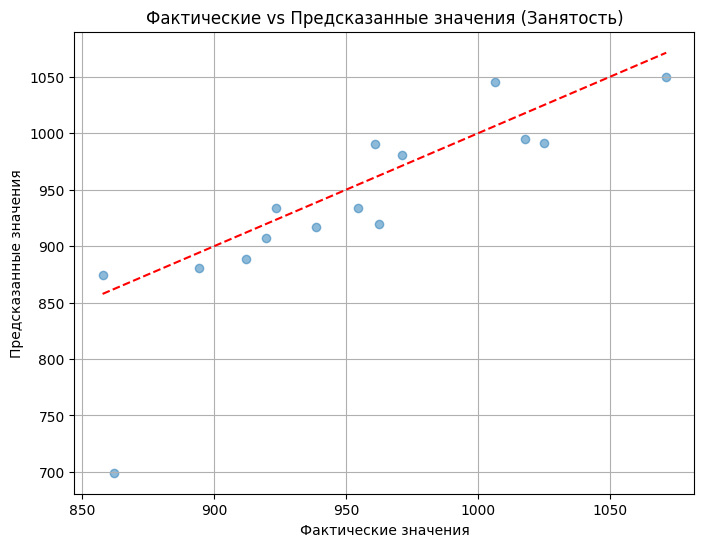

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения (Занятость)")
plt.grid()
plt.show()

**13. Остатки регрессии.**

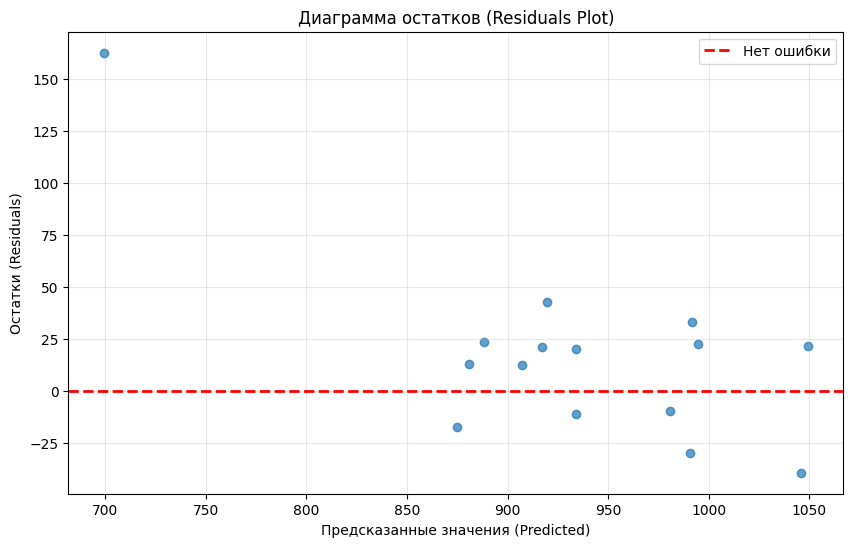

In [59]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Результат:**



*   Хорошо: Остатки беспорядочно разбросаны вокруг горизонтальной красной линии (нуля), нет никаких явных дуг, форм или конусов.
*   Плохо: Остатки образуют форму 'воронки' (гетероскедастичность) или кривую линию (нелинейность), что говорит о неадекватности модели.

